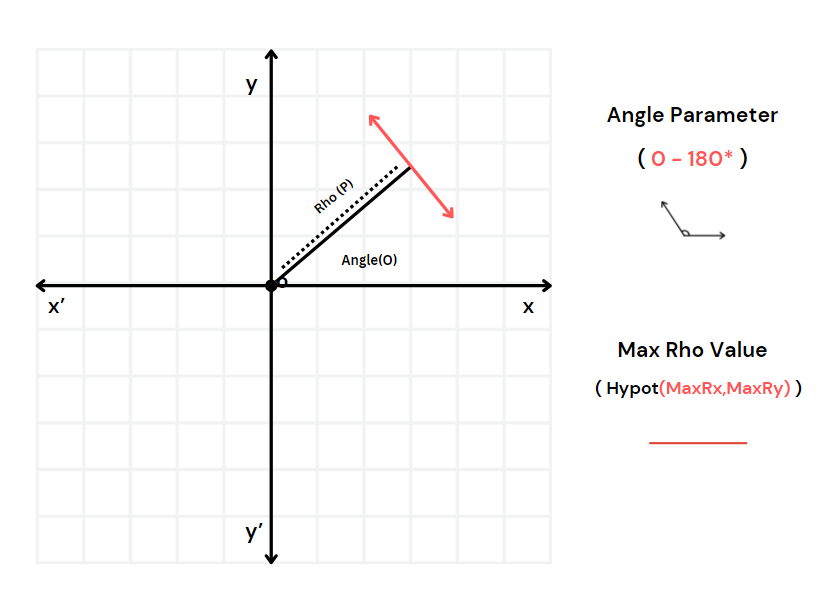

Degree : 0-360 Rho : -11-11
Angle : 126 and Line : 1


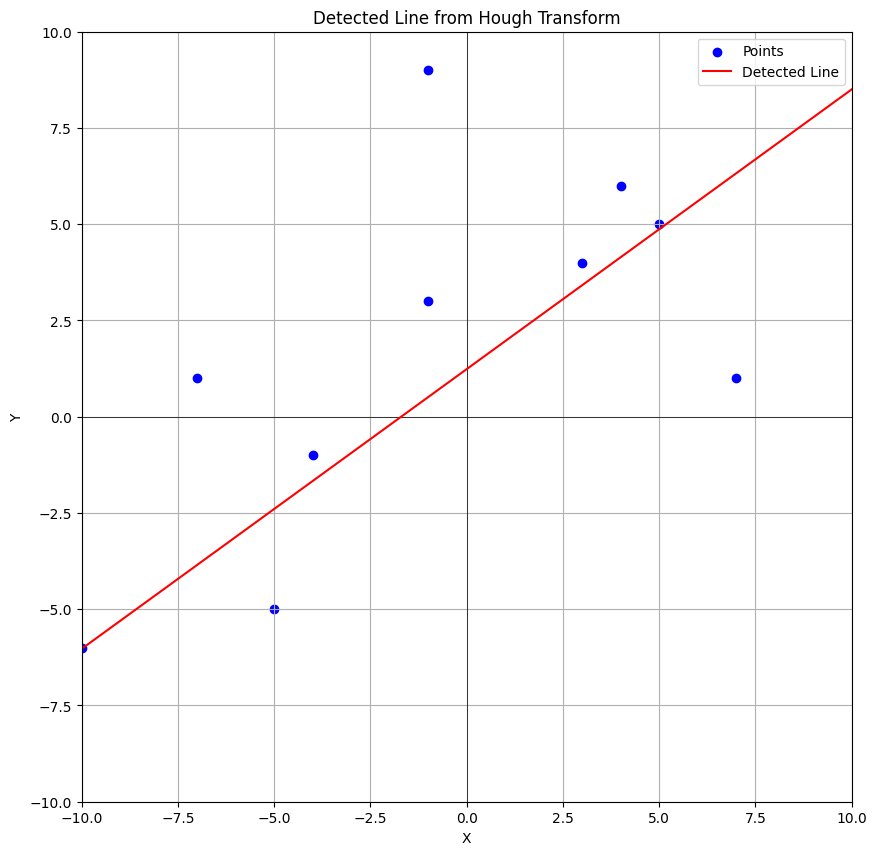

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt

# Sample data
Rx = np.random.randint(-10, 10, 10)
Ry = np.random.randint(-10, 10, 10)

# Parameters for the Hough Transform
TetaMin = 0
TetaMax = 360
PhoMax = int(mt.hypot(np.max(Rx), np.max(Ry)))
PhoMin = -PhoMax
print("Degree : {}-{} Rho : {}-{}".format(TetaMin, TetaMax, PhoMin, PhoMax))

# Initialize accumulator array
Memory = np.zeros((TetaMax, (PhoMax * 2) + 1))

# Hough Transform
for x, y in zip(Rx, Ry):
    for angle in range(TetaMin, TetaMax, 1):
        rad = np.deg2rad(angle)
        rho = int(x * np.cos(rad) + y * np.sin(rad))
        Memory[angle][rho + PhoMax] += 1

# Find the peak in the accumulator array
Maxival = np.max(Memory)
indices = np.where(Memory == Maxival)
Ang, Pho = indices[0][0], indices[1][0] - PhoMax
print("Angle : {} and Line : {}".format(Ang, Pho))

# Compute the line equation
rad = np.deg2rad(Ang)

# Plot settings
plt.figure(figsize=(10, 10))
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Detected Line from Hough Transform')

# Center the axes
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Scatter plot of points
plt.scatter(Rx, Ry, color='blue', label='Points')

# Check for vertical line (angle near 90 or 270 degrees)
slope = -np.cos(rad) / np.sin(rad)
intercept = Pho / np.sin(rad)

# Plot the detected line
x_line = np.linspace(-10, 10, 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', label='Detected Line')

# Add grid and legend
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
